In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FuseAI/winequality-red.csv',';', dtype=float)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [71]:
#normalize
maxvalq = df['quality'].max()
minvalq = df['quality'].min()

max_val_dict =  {}
min_val_dict =  {}

def normalize(df):
  normalizedDf = df.copy()
  for feature_name in df.columns:
    max_value = df[feature_name].max()
    max_val_dict.update({feature_name:max_value})
    min_value = df[feature_name].min()
    min_val_dict.update({feature_name:min_value})
    normalizedDf[feature_name] = (df[feature_name]-min_value) / (max_value - min_value)
  return normalizedDf

In [72]:
normalizedDf = normalize(df)
normalizedDf.head()
print(len(normalizedDf.index))

1599


In [ ]:
# max_val_dict

In [8]:
#another way to normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# normalizedDf = scaler.fit_transform(df)
# unscaled = scaler.inverse_transform(scaled)
normalizedDf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
UnnormalizedX = df.iloc[:,:-1].values
Unnormalizedy = df.iloc[:,-1].values

In [10]:
X = normalizedDf.iloc[:,:-1].values # for all features

In [11]:
y = normalizedDf.iloc[:,-1].values

In [ ]:
# X = df.iloc[:,:-1].values
# y = df.iloc[:,-1].values

In [12]:
un_X_train, un_X_test, un_y_train, un_y_test = train_test_split(UnnormalizedX,Unnormalizedy,test_size =0.002, random_state = 42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.02, random_state = 42)


### Visualizations

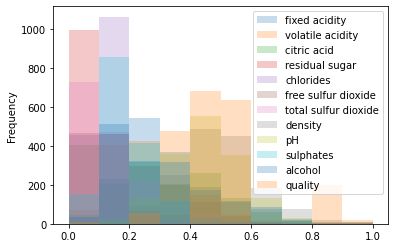

In [14]:
normalizedDf.plot.hist(alpha=0.25)

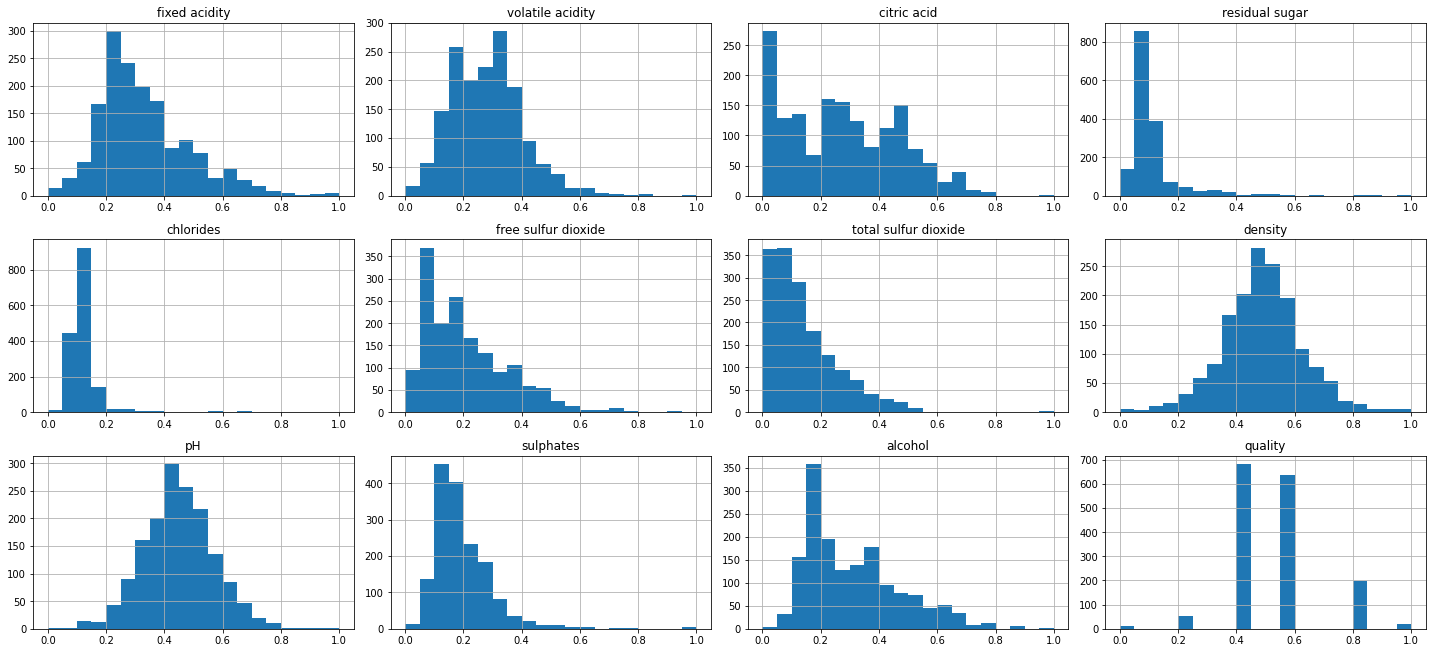

In [15]:
normalizedDf.hist(figsize=(20,30), bins=20, layout=(10,4))
# plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

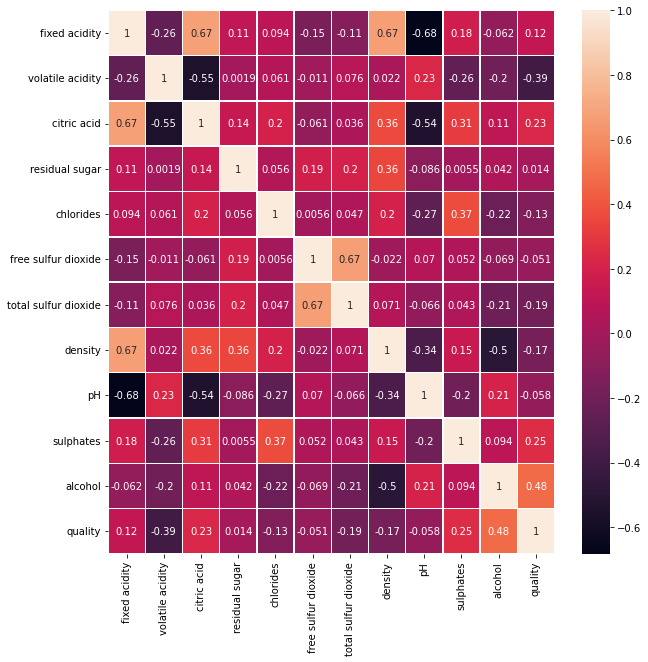

In [16]:
import seaborn as sns
corr_matrix = normalizedDf.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

In [17]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [18]:
#dataframe with only strong correlations
strongDf = normalizedDf.copy()

In [19]:
strongDf.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'chlorides','fixed acidity'], axis=1, inplace = True)

In [20]:
strongDf.describe()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.279329,0.270976,0.142996,0.490211,0.196496,0.311228,0.527205
std,0.122644,0.194801,0.116238,0.138571,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184932,0.090000,0.056537,0.406021,0.131737,0.169231,0.400000
50%,0.273973,0.260000,0.113074,0.490455,0.173653,0.276923,0.600000
75%,0.356164,0.420000,0.197880,0.570117,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
strongDf.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.397260,0.00,0.098940,0.567548,0.137725,0.153846,0.4
1,0.520548,0.00,0.215548,0.494126,0.209581,0.215385,0.4
2,0.438356,0.04,0.169611,0.508811,0.191617,0.215385,0.4
3,0.109589,0.56,0.190813,0.582232,0.149701,0.215385,0.6
4,0.397260,0.00,0.098940,0.567548,0.137725,0.153846,0.4


In [22]:
X_str = strongDf.iloc[:,:-1].values
y_str = strongDf.iloc[:,-1].values

In [23]:
len(X_str)

1599

In [24]:
len(y_str)

1599

In [25]:
X_train_strong, x_test_strong, y_train_strong, y_test_strong = train_test_split(X_str, y_str, test_size=0.2, random_state=42)

### With sklearn multiple linear regression

In [26]:
from sklearn import linear_model

In [27]:
reg = linear_model.LinearRegression()
#fit on all data
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.coef_

0.35917290989232475


array([ 0.05950514, -0.31228195, -0.036153  ,  0.05147977, -0.22559222,
        0.06297823, -0.18587436, -0.05932846, -0.09738675,  0.30665807,
        0.35205209])

In [28]:
#fit on  strong correlation data
sreg = linear_model.LinearRegression()
sreg.fit(X_train_strong, y_train_strong)
print(sreg.score(X_train_strong, y_train_strong))
sreg.coef_

0.3313533290748435


array([-0.34321251, -0.01705939, -0.1337897 ,  0.03350428,  0.21889863,
        0.39638674])

In [29]:
predsall = reg.predict(X_test)
predstr = sreg.predict(x_test_strong)

In [ ]:
print(predsall)
print(predstr)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [32]:
print("mean sq error %.2f"%mean_squared_error(y_test,predsall))
print("mean sq error %.2f"%mean_squared_error(y_test_strong,predstr))



mean sq error 0.02
mean sq error 0.02


In [33]:
print("Coeff of determination %.2f"%r2_score(y_test,predsall))
print("Coeff of determination %.2f"%r2_score(y_test_strong,predstr))

Coeff of determination 0.41
Coeff of determination 0.39


In [49]:
import pickle
pickle.dump(reg, open("regressionAllFeat.pkl", 'wb'))

In [ ]:
# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, preds, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

## logistic regression

In [36]:
dflogistic = df.copy()

In [37]:
dflogistic.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dflogistic['quality'] = pd.cut(dflogistic['quality'], bins = bins, labels=group_names, include_lowest=False)
label_quality = LabelEncoder()
dflogistic['quality'] = label_quality.fit_transform(dflogistic['quality'])
dflogistic['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

logisticX = dflogistic.drop('quality', axis=1)
logisticy = dflogistic['quality']

logX_train, logX_test, logy_train, logy_test = train_test_split(logisticX, logisticy, test_size=0.2,random_state=42)

In [40]:
logisticX

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(logX_train, logy_train)
log_reg_pred = log_reg.predict(logX_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
print(classification_report(logy_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



In [50]:
pickle.dump(log_reg, open("log_reg.pkl", 'wb'))

In [ ]:
#with grid_search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_log_reg = {
    'tol': [1e-4, 1e-3],
    'C': [ 0.5,1,2],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}
grid_log_reg  = GridSearchCV(log_reg, param_log_reg, scoring='accuracy')
grid_log_reg.fit(logX_train, logy_train)

In [44]:
grid_log_reg.best_params_

{'C': 2, 'solver': 'newton-cg', 'tol': 0.0001}

In [ ]:
grid_log_reg_pred = grid_log_reg.predict(logX_test)
print(classification_report(logy_test, grid_log_reg_pred))

## SGD classifier

In [47]:
from sklearn.linear_model import SGDClassifier
sgd =  SGDClassifier(loss='log') #logistic regression
sgd.fit(logX_train, logy_train)
sgd_pred = sgd.predict(logX_test)


In [48]:
print(classification_report(logy_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       273
           1       0.50      0.19      0.28        47

    accuracy                           0.85       320
   macro avg       0.69      0.58      0.60       320
weighted avg       0.82      0.85      0.82       320



In [51]:
pickle.dump(sgd, open("sgd.pkl", 'wb'))

## Gradient Boosting Classifer

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(logX_train, logy_train)
gradient_pred = gradient.predict(logX_test)


In [53]:
print(classification_report(logy_test, gradient_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320



In [54]:
#add grid search
param_gradient = {
    'learning_rate':[0.05, 0.1, 0.2],
    'n_estimators':[50, 100, 200, 500],
    'max_depth': [1,3,5]
}
grid_gradient = GridSearchCV(gradient, param_gradient, scoring='accuracy')
grid_gradient.fit(logX_train, logy_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [55]:
grid_gradient.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [56]:
gradient_grid_pred = grid_gradient.predict(logX_test)
print(classification_report(logy_test, gradient_grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320



In [57]:
pickle.dump(grid_gradient, open("gridGradientBoostingClassifer.pkl", 'wb'))

## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(max_depth = 5, n_estimators = 100, learning_rate = 0.2)
gb_regressor.fit(X_train, y_train)

gb_predict = gb_regressor.predict(X_test)

print("Coeff of determination %.2f"%r2_score(y_test,gb_predict))


Coeff of determination 0.43


In [ ]:
#for strongly correlated columns only
gb_regressor_str = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.2)
gb_regressor_str.fit(X_train_strong, y_train_strong)

gb_predict_str = gb_regressor_str.predict(x_test_strong)

print("Coeff of determination %.2f"%r2_score(y_test_strong, gb_predict_str))

Coeff of determination 0.39


In [74]:
# #
# pickle.dump(max_val_dict, open("max_val_dict.pkl","wb"))
# pickle.dump(min_val_dict, open("min_val_dict.pkl","wb"))

In [76]:
# mvd = pickle.load(open("max_val_dict.pkl", "rb"))
# print(mvd)

{'fixed acidity': 15.9, 'volatile acidity': 1.58, 'citric acid': 1.0, 'residual sugar': 15.5, 'chlorides': 0.611, 'free sulfur dioxide': 72.0, 'total sulfur dioxide': 289.0, 'density': 1.00369, 'pH': 4.01, 'sulphates': 2.0, 'alcohol': 14.9, 'quality': 8.0}


In [77]:
# mivd = pickle.load(open("min_val_dict.pkl","rb"))
# print(mivd)

{'fixed acidity': 4.6, 'volatile acidity': 0.12, 'citric acid': 0.0, 'residual sugar': 0.9, 'chlorides': 0.012, 'free sulfur dioxide': 1.0, 'total sulfur dioxide': 6.0, 'density': 0.99007, 'pH': 2.74, 'sulphates': 0.33, 'alcohol': 8.4, 'quality': 3.0}


## prediction for deployment

In [83]:
#for deployment prediction code

#-------------features---------------(input by a user)
# fixed_acidity = {'fixed acidity': 11.2}
# volatile_acidity = {'volatile acidity': 0.28}
# citric_acid = {'citric acid': 0.56}
# residual_sugar = {'residual sugar': 1.9}
# chlorides = {'chlorides': 0.075}
# free_so2 = {'free sulfur dioxide': 17}
# total_so2 = {'total sulfur dioxide': 60}
# density = {'density': 0.998}
# pH = {'pH': 3.16}
# sulphates = {'sulphates': 0.58}
# alcohol = {'alcohol': 9.8}

all_dic = {'fixed acidity': 11.2, 'volatile acidity': 0.28, 'citric acid': 0.56,
           'residual sugar': 1.9, 'chlorides': 0.075, 'free sulfur dioxide': 17, 
           'total sulfur dioxide': 60, 'density': 0.998, 'pH': 3.16, 'sulphates': 0.58,
           'alcohol': 9.8}

norm_list = np.array(list(all_dic.values()))
#-------------features-------------

#--------normalize-------
max_vd = pickle.load(open("max_val_dict.pkl", "rb"))
max_vd.pop('quality')
maxx = np.array(list(max_vd.values()))

min_vd = pickle.load(open("min_val_dict.pkl", "rb"))
min_vd.pop('quality')
minn = np.array(list(min_vd.values()))

infer_me_this_batman = (norm_list-minn)/(maxx-minn)
# print(infer_me_this_batman)


#--------normalize-------

infer_on = np.expand_dims(infer_me_this_batman, 0)
# print(infer_on)

model = pickle.load(open("regressionAllFeat.pkl","rb"))
# print(log_reg_loaded)
inferred = model.predict(infer_on)
print(inferred)


[0.53734828]
